Имеются данные adult.csv (см. в материалах к занятию).
Целевой переменной является уровень дохода income (крайний правый столбец).
Описание признаков можно найти по ссылке www.cs.toronto.edu...etail.html
Вам необходимо построить модели логистической регрессии и SVM, которые предсказывает уровень дохода человека.
Вывести качество полученных моделей на тестовой выборке, используя функцию score у модели.


In [1]:
import pandas as pd
import numpy as np
from bubble_plot.utils import describe_categorical_values
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import seaborn as sns

# EDA

In [2]:
data = pd.read_csv( 'adult.csv' )
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Пропущенных данных нет, 6 числовы, 8 категориальных признаков.

In [4]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Здесь мы видим, что возраст имеет нормальное распределение,

в то время как распределения изменений капитала имеют отклонение вправо (не менее 75% данных каждого признака нули)

In [5]:
describe_categorical_values(data)

,0,1,2,3,4
age,36: 3%,35: 3%,33: 3%,23: 3%,31: 3%
workclass,Private: 69%,Self-emp-not-inc: 8%,Local-gov: 6%,?: 6%,State-gov: 4%
fnlwgt,203488: 0%,190290: 0%,120277: 0%,125892: 0%,126569: 0%
education,HS-grad: 32%,Some-college: 22%,Bachelors: 16%,Masters: 5%,Assoc-voc: 4%
educational-num,9: 32%,10: 22%,13: 16%,14: 5%,11: 4%
marital-status,Married-civ-spouse: 46%,Never-married: 33%,Divorced: 14%,Separated: 3%,Widowed: 3%
occupation,Prof-specialty: 13%,Craft-repair: 13%,Exec-managerial: 12%,Adm-clerical: 11%,Sales: 11%
relationship,Husband: 40%,Not-in-family: 26%,Own-child: 16%,Unmarried: 10%,Wife: 5%
race,White: 86%,Black: 10%,Asian-Pac-Islander: 3%,Amer-Indian-Eskimo: 1%,Other: 1%
gender,Male: 67%,Female: 33%,None,None,None


Здесь мы можем увидеть, что fnlwgt имеют уникальные значения, позже мы это проверим,

Ненормальное распределение признаков:
- workclass со значением Private 69%
- education	HS-grad: 32%	Some-college: 22%	Bachelors: 16% три значения составляют 70%, надо проверить сколько всего значений
- educational-num соответствует education
- marital-status	Married-civ-spouse: 46%	Never-married: 33% два значения составляют 79%
- relationship	Husband: 40%	Not-in-family: 26%	в сумме 66%
- race в основном значение white 86% остальные можно заменить на not white (1, 0 соответственно)
- gender в основном male (логично при 40% Husband)
- capital-gain и capital-loss практически без данных
- hours-per-week половина работает по 40 часов в неделю. Но при этом нет изменений доходов и расходов...похоже что нули - это отсутствующие данные
- native-country 90% USA остальные я бы перевёл в not USA (1, 0 соответственно)
- income <=50K: 76%	>50K: 24% (1 = >50K, 0 = <=50K)



Нормальное распределение:
- occupation
- age

In [6]:
df = data.copy()

In [7]:
numeric = df._get_numeric_data().columns.to_list()
categoric = [col for col in df.columns if col not in numeric]

In [8]:
categoric

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [9]:
for col in categoric:
    print('\n', col, '\n\n', df[col].value_counts())


 workclass 

 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

 education 

 HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

 marital-status 

 Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

 occupation 

 Prof-specialty       6172
Craft-repa

У нас есть пропущенные данные "?" которые мы заменим на np.nan и заполним самыми частовстречающимися.

In [10]:
df['workclass'].replace('?', np.nan, inplace=True)
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)

А ещё у нас есть такие категориальные значения, которые мы можем заменить числовой последовательностью.

Заодно проверим, есть ли школьники с доходом выше 50к


In [11]:
list(df['education'].unique())

['11th',
 'HS-grad',
 'Assoc-acdm',
 'Some-college',
 '10th',
 'Prof-school',
 '7th-8th',
 'Bachelors',
 'Masters',
 'Doctorate',
 '5th-6th',
 'Assoc-voc',
 '9th',
 '12th',
 '1st-4th',
 'Preschool']

In [12]:
school = [x for x in df['education'].unique() if 'th' in x]
df[df['education'].isin(school)]['income'].value_counts()
# захотелось снова в школу

<=50K    5960
>50K      365
Name: income, dtype: int64

т.к. числовое представление признака eucation у нас есть, текстовое мы можем удалить. Но сначала проверим насколько они соответсвуют друг другу

In [13]:
for e in list(df['education'].unique()):
    assert len(df[df['education']== e]['educational-num'].value_counts()) == 1

In [15]:
# Подготовка данных

In [16]:
df.drop(columns=['education'], inplace=True)

In [17]:
df['occupation'].replace('?', np.nan, inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

In [18]:
# в признаке "Race" заменим значения White = 1, и "все остальные" = 0
df['race'] = np.where(df['race'] == "White", 1, 0)

In [19]:
# в признаке "gender" заменим значения male = 1, и female = 0
df['gender'] = np.where(df['gender'] == "Male", 1, 0)

In [20]:
# в признаке "native-country" заменим значения: United-States = 1, и все остальные = 0
df['native-country'] = np.where(df['native-country'] == "United-States", 1, 0)

0.5839850947954629

In [21]:
df['fnlwgt'].nunique()/df.shape[0]
# ок, значения не уникальные. Оставим, но нормализуем их

# в признаке "income" заменим значения >50K = 1, и <=50K = 0
df['income'] = np.where(df['income'] == ">50K", 1, 0)

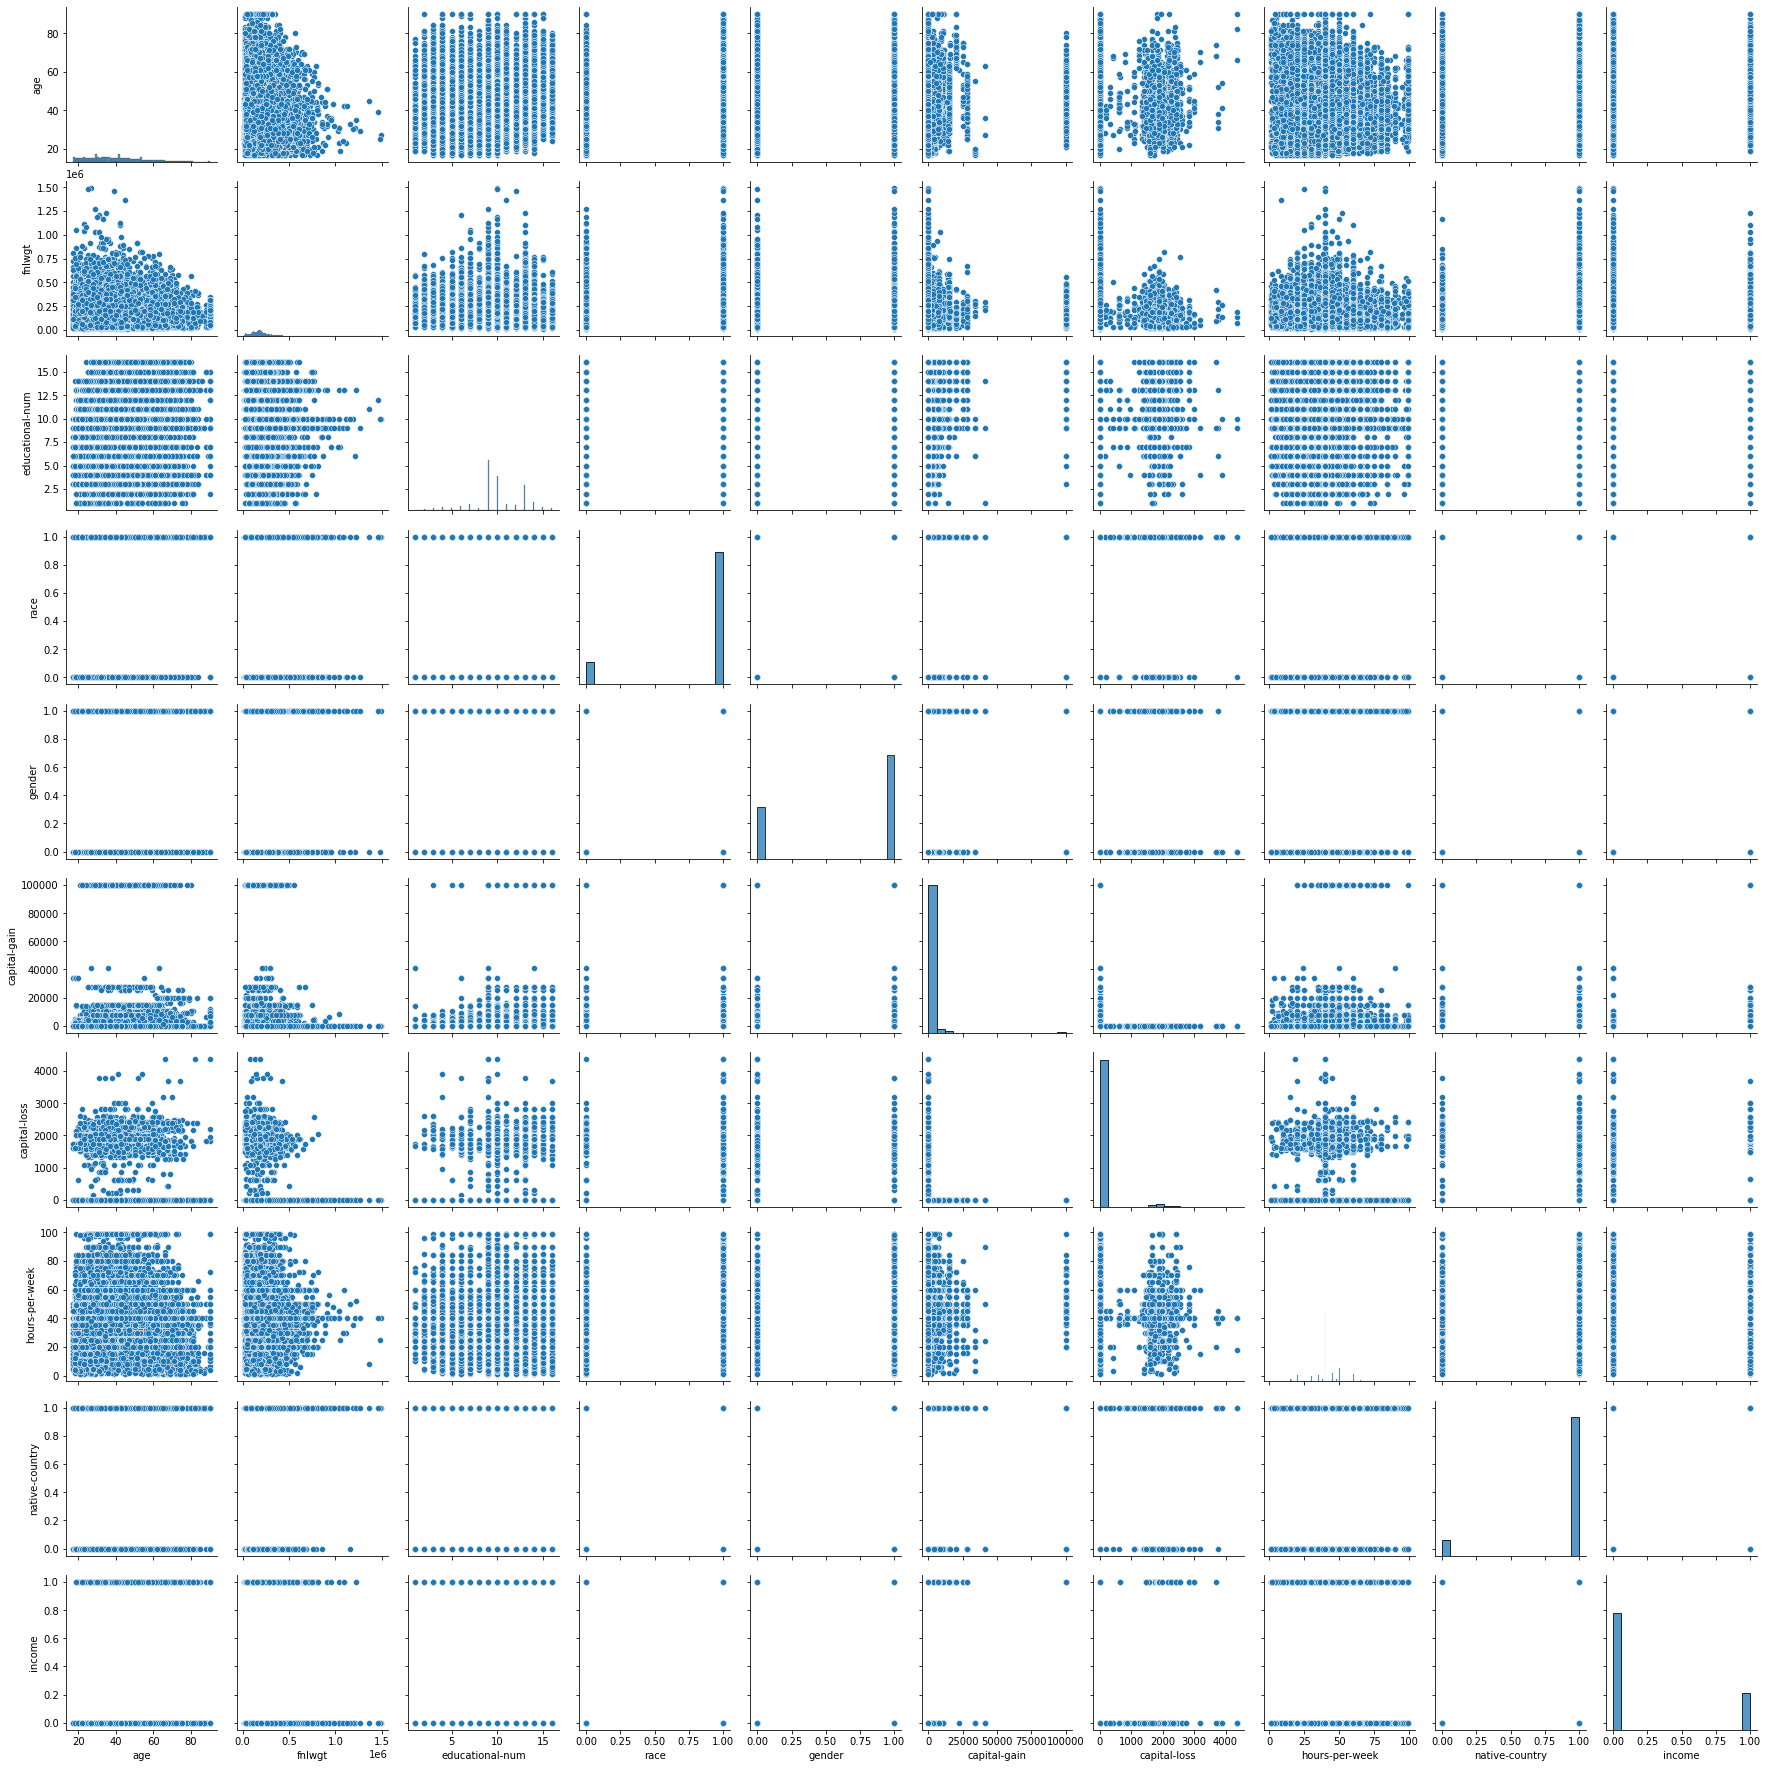

In [23]:
## Проверка на выбросы

In [24]:
sns.pairplot(df);

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,0,1,0,0,40,1,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,1,1,0,0,50,1,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,1,1,0,0,40,1,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,0,1,7688,0,40,1,1
4,18,Private,103497,10,Never-married,Prof-specialty,Own-child,1,0,0,0,30,1,0


In [26]:
df.describe()

In [27]:
# capital-gain и capital-loss мы не можем проверить таким образом, т.к. верхний квантиль = 0
# также, если мы удалим эти признаки, качество ухудшится
for param in ['hours-per-week','fnlwgt']:
    df = remove_outlier(df,param)

99 52.5 1 32.5
1490400 419231.625 13769 -61439.375


In [28]:
# Преобразование данных
## Нормализация

In [29]:
scaler = StandardScaler()
df[['age', 'fnlwgt', 'hours-per-week','capital-gain','capital-loss']] = scaler.fit_transform(df[['age', 'fnlwgt', 'hours-per-week','capital-gain','capital-loss']])

In [30]:
## Бинарное преобразование категориальных значений

In [31]:
df = pd.get_dummies( df, columns= [ 'workclass', 'marital-status', 'occupation', 'relationship'])
df.shape, data.shape

((34265, 45), (48842, 15))

Данные подготовлены
# Моделирование
## Логистическая регрессия

In [32]:
model = LogisticRegression()

In [33]:
X = df.drop(columns= ['income']).copy()
y = df['income']

model.fit( X, y )

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
lr_score = model.score(X, y)
lr_score

0.8436888953742886

## SVM

In [37]:
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [38]:
SVM_score = clf.score(X, y)
SVM_score

0.8436305267765942

In [39]:
print("Для данного датасета лучшего результата удалось добиться с помощью")
print("Linear regression с точностью ", lr_score) if lr_score > SVM_score else  print("SVM с точностью ", SVM_score)




Для данного датасета лучшего результата удалось добиться с помощью
Linear regression с точностью  0.8436888953742886


scaler = StandardScaler()
scaler.fit_transform(df[['']])

print(scaler.mean_)

print(scaler.transform(data))